In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    mean_squared_log_error,
)
from rich.console import Console
from rich.table import Table
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_200.csv')
#df_march = df.loc[df['month']== 'March']
#df_march = df_march.loc[(df_march['handling_time'] > 10)]
#df_march_queue = df_march.loc[(df_march['queue_id']) == 'mgmsales']
#df_march_queue_1140 = df_march_queue.loc[(df_march['agent_id']) == 1600]

In [71]:
df

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,month,date,day_time,datetime,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,February,2023-23-02,20:02:36,2023-02-23 20:54:36,1677185676,78
1,1000,equipez4,AUTO,91.0,5,1,0,1,1,3.0,4,February,2023-23-02,21:02:47,2023-02-23 21:12:47,1677186767,3
2,1000,equipez4,AUTO,89.0,5,1,0,1,1,67.0,4,February,2023-23-02,21:02:26,2023-02-23 21:13:26,1677186806,5
3,1000,equipez4,AUTO,48.0,4,14,0,2,1,1.0,4,February,2023-23-02,21:02:26,2023-02-23 21:13:26,1677186806,2
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,February,2023-23-02,21:02:44,2023-02-23 21:13:44,1677186824,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104764,1573,isnrecuperacao,OUT,11.0,5,0,15,0,1,1.0,1,April,2023-24-04,21:04:26,2023-04-24 21:02:26,1682370146,47
104765,1137,isjaguars,OUT,21.0,5,0,15,0,1,3.0,1,April,2023-24-04,21:04:36,2023-04-24 21:02:36,1682370156,70
104766,1572,isnxsell,OUT,11.0,5,0,40,0,1,3.0,1,April,2023-24-04,21:04:44,2023-04-24 21:02:44,1682370164,2
104767,1600,mgmsales,OUT,89.0,5,0,16,0,1,5.0,1,April,2023-24-04,21:04:51,2023-04-24 21:02:51,1682370171,4


In [72]:
df_10 = df.loc[(df['handling_time'] > 10)]
df_10_queue = df_10.loc[df_10['queue_id'] == 'equipez4']
df_10_queue

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,month,date,day_time,datetime,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,February,2023-23-02,20:02:36,2023-02-23 20:54:36,1677185676,78
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,February,2023-23-02,21:02:44,2023-02-23 21:13:44,1677186824,23
5,1116,equipez4,OUT,14.0,5,0,10,0,1,5.0,5,February,2023-24-02,13:02:11,2023-02-24 13:04:11,1677243851,48
6,1116,equipez4,OUT,11.0,5,0,50,0,1,3.0,5,February,2023-24-02,13:02:12,2023-02-24 13:08:12,1677244092,53
7,1116,equipez4,OUT,NaN,5,0,11,0,1,NaN,5,February,2023-24-02,13:02:08,2023-02-24 13:43:08,1677246188,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,1629,equipez4,AUTO,81.0,5,10,1,1,1,1.0,3,April,2023-12-04,23:04:29,2023-04-12 23:42:29,1681342949,15
87848,1648,equipez4,OUT,21.0,5,0,7,0,1,5.0,4,April,2023-13-04,20:04:05,2023-04-13 20:51:05,1681419065,186
88545,1587,equipez4,OUT,71.0,5,0,8,0,1,3.0,4,April,2023-13-04,21:04:18,2023-04-13 21:54:18,1681422858,36
89113,1587,equipez4,OUT,71.0,5,0,6,0,1,3.0,5,April,2023-14-04,14:04:47,2023-04-14 14:52:47,1681483967,17


In [73]:
df_10_march = df_10_queue.loc[(df_10_queue['month'] == 'March')]

In [74]:
df_10_march

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,month,date,day_time,datetime,timestamp,handling_time
8261,1120,equipez4,OUT,19.0,5,0,11,0,1,3.0,3,March,2023-01-03,13:03:17,2023-03-01 13:11:17,1677676277,159
8284,1117,equipez4,OUT,31.0,5,0,10,0,1,3.0,3,March,2023-01-03,14:03:33,2023-03-01 14:13:33,1677680013,24
8285,1118,equipez4,OUT,33.0,5,0,22,0,1,5.0,3,March,2023-01-03,14:03:52,2023-03-01 14:13:52,1677680032,15
8290,1126,equipez4,OUT,41.0,8,0,21,0,1,67.0,3,March,2023-01-03,14:03:18,2023-03-01 14:14:18,1677680058,31
8337,1115,equipez4,OUT,11.0,5,0,5,0,1,5.0,3,March,2023-01-03,14:03:03,2023-03-01 14:20:03,1677680403,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66853,1637,equipez4,AUTO,51.0,5,4,0,1,1,67.0,5,March,2023-31-03,21:03:16,2023-03-31 21:44:16,1680299056,14
66858,1637,equipez4,AUTO,11.0,5,4,0,1,1,3.0,5,March,2023-31-03,21:03:39,2023-03-31 21:44:39,1680299079,108
66861,1642,equipez4,AUTO,71.0,5,4,0,1,1,5.0,5,March,2023-31-03,21:03:54,2023-03-31 21:44:54,1680299094,64
66882,1641,equipez4,AUTO,21.0,5,2,0,1,1,67.0,5,March,2023-31-03,21:03:57,2023-03-31 21:46:57,1680299217,57


In [76]:
df_10_march_hw = pd.DataFrame()
df_10_march_hw['datetime'] = df_10_march['datetime']
df_10_march_hw['handling_time'] = df_10_march['handling_time']
df_10_march_hw

,datetime,handling_time
8261,2023-03-01 13:11:17,159
8284,2023-03-01 14:13:33,24
8285,2023-03-01 14:13:52,15
8290,2023-03-01 14:14:18,31
8337,2023-03-01 14:20:03,11
...,...,...
66853,2023-03-31 21:44:16,14
66858,2023-03-31 21:44:39,108
66861,2023-03-31 21:44:54,64
66882,2023-03-31 21:46:57,57


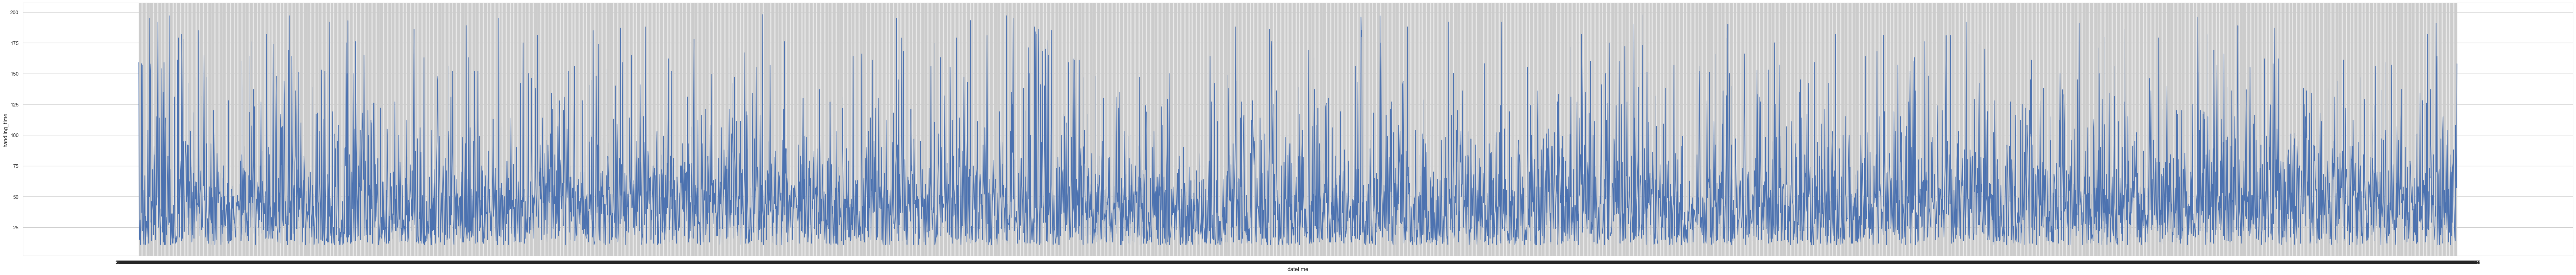

In [78]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (100,10))
sns.lineplot(df_10_march_hw, x="datetime", y="handling_time")
plt.show()

In [82]:
decompose_result = seasonal_decompose(df.asfreq('MS'),model='additive')
decompose_result.plot();
#https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be option 2

ValueError: This function does not handle missing values